# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data\\train.p"
validation_file= "traffic-signs-data\\valid.p"
testing_file = "traffic-signs-data\\test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#Check the the lenghts of features are the same as that of labels
assert(len(X_train)==len(y_train))
assert(len(X_valid)==len(y_valid))
assert(len(X_test)==len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))
    
print("Updated Image Shape: {}".format(X_train[0].shape))

print("y_train are ", set(y_train))




Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples
Updated Image Shape: (32, 32, 3)
y_train are  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results




# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

print("Image shape", X_train.shape)
print("Image size", X_train.size)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.

n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Image shape (34799, 32, 32, 3)
Image size 106902528
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from collections import Counter 
from itertools import groupby

### Visualizations will be shown in the notebook.
%matplotlib inline



"""
### Declare some variables
all_labels = []  # A list to store all label names

#select the csv file, the header has been removed from the file
with open('signnames.csv', 'r') as csvFile:
    for row in csv.reader(csvFile, delimiter=','):
        all_labels += [row[1]] # put all sign names in the variable


### Show images with it label.
num_of_samples=[]
plt.figure(figsize=(15, 50))
for i in range(0, n_classes):
    plt.subplot(15, 4, i+1)
    x_selected = X_train[y_train == i]
    random_num = np.random.randint(len(x_selected))
    #plt.imshow(x_selected[random_num, :, :, :]) #draw a random image of each class
    plt.imshow(x_selected[random_num])
    plt.title(all_labels[i])
    plt.axis('off')
    num_of_samples.append(len(x_selected))
T
### Show number of samples in each class, the header needs to removed from the csv file
figure, axis = plt.subplots(figsize=(15,20))
labels = np.arange(len(all_labels))
countEachClass = [len(list(group)) for key, group in groupby(y_train)]

axis.barh(labels, countEachClass)
axis.set_yticks(labels)
axis.set_yticklabels(all_labels)
axis.invert_yaxis() # reverse the order of label names
axis.set_xlabel("Count of each sign class")
axis.set_title("Numbers of each sign")
"""



counter = Counter(y_train)
print("y_train", y_train)











y_train [41 41 41 ... 25 25 25]


In [4]:
# Read the signnames file and set inex 
signnamesFile = pd.read_csv('./signnames.csv')
signnamesFile.set_index('ClassId', inplace = True)

def get_name_from_label(label):
    # Restrieve the corresponding string from the index
    return signnamesFile.loc[label].SignName

counts = pd.DataFrame(columns = ['sign_label', 'count'], 
                       data=[(label, count) for label, count in counter.items()])
counts['sign_name'] = counts.sign_label.apply(get_name_from_label)



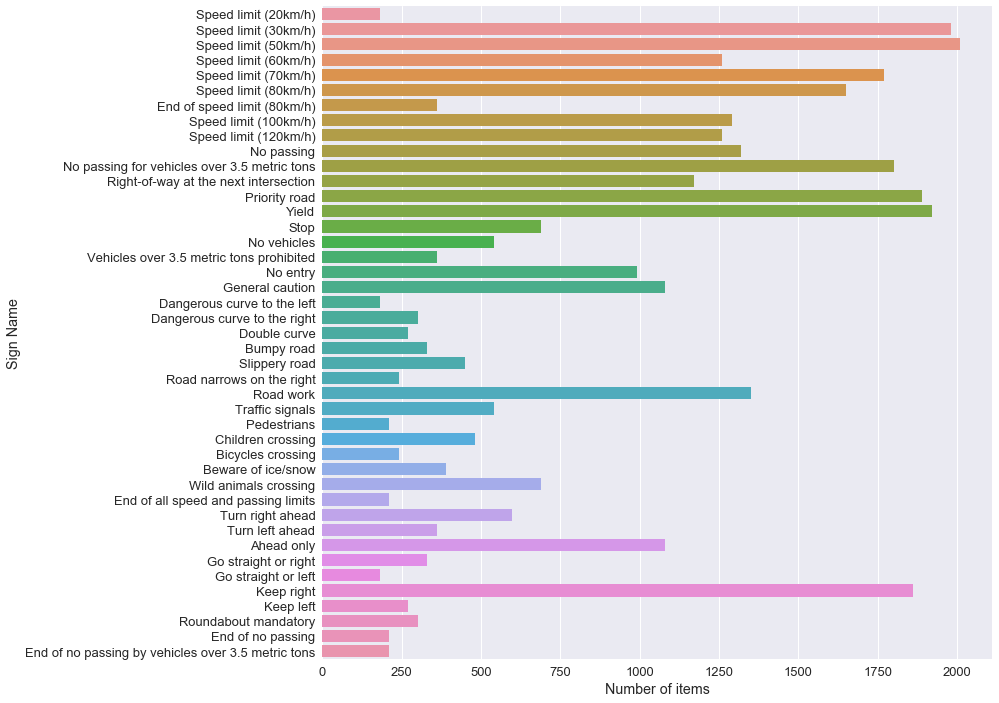

In [5]:
#Plotting the graph
plt.figure(figsize=(12,12))
sns.set(font_scale=1.3)
sns.barplot(x='count',y='sign_name',data=counts)
plt.ylabel('Sign Name')
plt.xlabel('Number of items')



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Importing some useful packages
import cv2
import matplotlib.gridspec as gridspec
from sklearn.utils import shuffle



In [7]:
### Implement some functions for pre-processing the images, the images augmentation functions are inspired by github repository 
### https://github.com/vxy10/ImageAugmentation/blob/master/img_transform_NB.ipynb
def augment_brightness(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25 + np.random.uniform()
    image1[:,:,2] = image[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

def transform_image(img,ang_range=20,shear_range=10,trans_range=5):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    #img = augment_brightness(img)
    img = sharpen_img(img)
    
    return img

def normalize(pixel):
    return pixel / 255

#show a given image and then show 10 samples transformed images processed by transform_image function above, given a input image
def demoTransformed(image):
    print("Displaying the original image and its transformed images")
    plt.title("Original Image")
    plt.imshow(image)
    gs1 = gridspec.GridSpec(10,10)
    gs1.update(wspace=0.01, hspace=0.02) 
    plt.figure(figsize=(12,12))
    for i in range(10):
        ax1 = plt.subplot(gs1[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        img = transform_image(imgSelected,20,10,5)

        plt.subplot(10,10,i+1)
        plt.imshow(img)
        plt.axis('off')
        


    
    




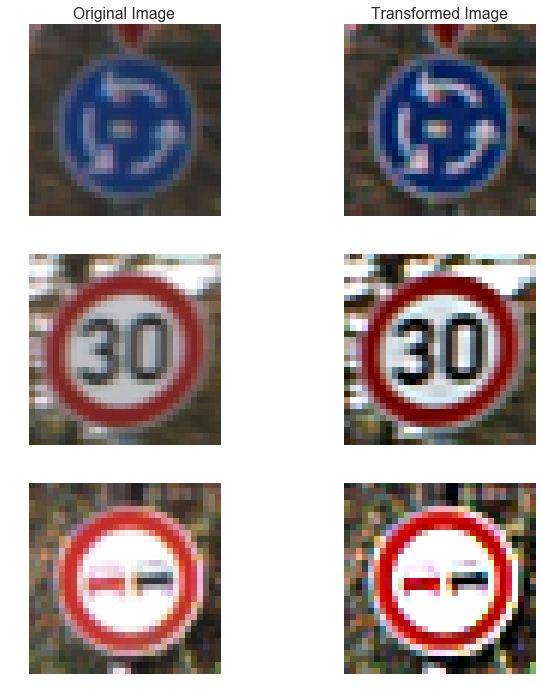

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


"""



#Show 10 examples of the transformed (augmented) images
x_selected = X_train[y_train == 0]
random_num = np.random.randint(len(x_selected))
imgSelected = x_selected[random_num]
demoTransformed(imgSelected)

print(len(X_train[y_train == 3]))


# For the training images, augment the images and increase the number of images to the specified threshold if the total
# number of the images for that label is below the threshold
for i in range(len(countEachClass)):
    print("This function is now running on label number ", i)
    if(countEachClass[i]<imgNoThreshold): 
        for j in range((imgNoThreshold - countEachClass[i])):
            x_selected = X_train[y_train == i]
            random_num = np.random.randint(len(x_selected))
            imageSelected = x_selected[random_num]
            imgTransformed = transform_image(imageSelected,20,10,5)
            np.append(X_train[y_train == i], imgTransformed)


# Demostrating the transform_image function by showing the orignal image and 10 transformed images 
random_label = np.random.randint(len(set(y_train)))
x_selected = X_train[y_train == random_label]
random_num = np.random.randint(len(x_selected))
imgSelected = x_selected[random_num]
demoTransformed(imgSelected)


X_train_aug = []
y_train_aug = []
X_valid_prepro = []
y_valid_prepro = []
X_test_prepro = []
y_test_prepro = []

print("Original length ", len(X_train))

# For each training image, create four additional augmented images
for i in range(len(X_train)):
    X_train_aug.append(X_train[i])
    y_train_aug.append(y_train[i])
    for j in range(4):
        img = transform_image(X_train[i])
        X_train_aug.append(img)
        y_train_aug.append(y_train[i])
        

        


# Convert the datatype of X_valid and X_test to list
for i in range(len(X_valid)):
    X_valid_prepro.append(X_valid[i])
    y_valid_prepro.append(y_valid[i])
for i in range(len(X_test)):
    X_test_prepro.append(X_test[i])
    y_test_prepro.append(y_test[i])






from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
"""    
# Shuffling the training data
X_train, y_train = shuffle(X_train, y_train)

# Showing a few original images and its preprocessed images 
plt.figure(figsize=(10,10))
img = X_train[100]
plt.subplot(3,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(3,2,2)
plt.axis('off')
plt.imshow(sharpen_img(img))
plt.title('Transformed Image')


img = X_train[1000]
plt.subplot(3,2,3)
plt.imshow(img)
plt.axis('off')
plt.subplot(3,2,4)
plt.axis('off')
plt.imshow(sharpen_img(img))

img = X_train[2190]
plt.subplot(3,2,5)
plt.imshow(img)

plt.axis('off')
plt.subplot(3,2,6)
plt.axis('off')
plt.imshow(sharpen_img(img))
plt.tight_layout()


# Sharpen the images 
for i in range(len(X_train)):
    X_train[i] = sharpen_img(X_train[i])
for i in range(len(X_valid)):
    X_valid[i] = sharpen_img(X_valid[i])
for i in range(len(X_test)):
    X_test[i] = sharpen_img(X_test[i])
    
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)



### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Setup TensorFlow
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten
def LeNet(x):
        # Arguments used for tf.truncated_normal, randomly defines variables for weights and bias 
        # for each player
        mu = 0
        sigma = 0.1
        
        # Layer 1: Convolutional. Input = 32x32x1. Ooutput = 28x28x6.
        conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(6))
        conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding="VALID") + conv1_b
        
        #Activation
        conv1 = tf.nn.relu(conv1)
        
        # Pooling. Input = 28x28x6. Output = 14x14x6. 
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1,2,2,1], padding='VALID')
        
        # Layer 2: Convolutional. Output = 10x10x16
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(16))
        conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
        
        # Activation
        conv2 = tf.nn.relu(conv2)
        
        # Pooling. Input = 10x10x16. Output = 5x5x16.
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding='VALID')
        
        # Flatter. Input = 5x5x16. Output = 400.
        fc0 = flatten(conv2)
        
        # Layer 3: Fully Connected. Input = 400. Output = 120.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(120))
        fc1 = tf.matmul(fc0, fc1_W) + fc1_b
        
        # Activation 
        fc1 = tf.nn.relu(fc1)
        
        # Layer 4: Fully Connected. Input = 120. Output = 84.
        fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
        fc2_b = tf.Variable(tf.zeros(84))
        fc2 = tf.matmul(fc1, fc2_W) + fc2_b
        
        # Activation
        fc2 = tf.nn.relu(fc2)
        
        # Layer 5: Fully Connected. Input = 84. Output = 10.
        fc3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
        fc3_b = tf.Variable(tf.zeros(43))
        logits = tf.matmul(fc2, fc3_W) + fc3_b
        
        return logits
        
        
        
        


C:\Users\Jason\Miniconda3\envs\carnd-term1\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [10]:
"""

X_train = X_train_aug
y_train = y_train_aug
X_valid = X_valid_prepro
y_valid = y_valid_prepro
X_test = X_test_prepro
y_test = y_test_prepro


# Normalize the images
for i in range(len(X_train)):
    X_train[i] = normalize(X_train[i])
for i in range(len(X_valid)):
    X_valid[i] = normalize(X_valid[i])
for i in range(len(X_test)):
    X_test[i] = normalize(X_test[i])
"""    



'\n\nX_train = X_train_aug\ny_train = y_train_aug\nX_valid = X_valid_prepro\ny_valid = y_valid_prepro\nX_test = X_test_prepro\ny_test = y_test_prepro\n\n\n# Normalize the images\nfor i in range(len(X_train)):\n    X_train[i] = normalize(X_train[i])\nfor i in range(len(X_valid)):\n    X_valid[i] = normalize(X_valid[i])\nfor i in range(len(X_test)):\n    X_test[i] = normalize(X_test[i])\n'

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)


rate = 0.0001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)                       
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset: offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x:batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

########### Train the Model ######################
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
                       
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    saver.save(sess, './lenet')
    print("Model saved")
    

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

Training...

EPOCH 1 ...
Validation Accuracy = 0.198

EPOCH 2 ...
Validation Accuracy = 0.361

EPOCH 3 ...
Validation Accuracy = 0.497

EPOCH 4 ...
Validation Accuracy = 0.578

EPOCH 5 ...
Validation Accuracy = 0.656

EPOCH 6 ...
Validation Accuracy = 0.709

EPOCH 7 ...
Validation Accuracy = 0.737

EPOCH 8 ...
Validation Accuracy = 0.754



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
from PIL import Image
file_path = "C:\\Users\\Jason\\OneDrive\\Self-driving Car\\Traffic Sign Classifier Project\\CarND-Traffic-Sign-Classifier-Project\\
images_from_web\\"
testImage1 = Image.open(file_path+"img6.jpg")
#plt.imshow(testImage1)

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.





### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.